# Combine multiple subsequent Runs NetCDF into One with all outputsteps

CLEAN: Follow approahc like in PlotAnimationSingleRun.ipynb

Combines multi-run netCDF's, combines them along time and writes .mp4 animations (real nice)

Rule: notesbooks only handle plotting, processing logic should be handled in dedicated .py files

* [Reading multi-file datasets](https://xarray.pydata.org/en/stable/combining.html#combining-multi)
* [Parallel computing with Dask](https://xarray.pydata.org/en/stable/dask.html)
* [xarray Concatenate](https://xarray.pydata.org/en/stable/combining.html#concatenate)

## Todo
* Use ufuncs?

In [1]:
import datashader as ds
import numpy as np
import xarray as xr
from JulesD3D.cleanNetCDF import fixMeshGrid, makeVelocity, addDepth, addUnderlayerCoords, addVectorSum, makeVectorSumsSediments
from JulesD3D.processing_2d import vector_sum
from IPython.display import Markdown as md
import pandas as pd
pd.set_option('display.max_rows', None)

In [2]:
import holoviews as hv
import warnings
from holoviews import opts
from holoviews.operation.datashader import datashade, rasterize
from holoviews.operation import decimate

In [3]:
renderer = hv.renderer('matplotlib')
warnings.simplefilter('ignore')
hv.extension('matplotlib') 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Uniform animation settings

In [4]:
plot_settings = {
    'aspect': 0.74,
    'colorbar': True,
    'fig_inches': (7, 10)
}
fps = 2.5
plot_settings

{'aspect': 0.74, 'colorbar': True, 'fig_inches': (7, 10)}

In [5]:
outputfolder = "output_material/"

In [6]:
# help(xr.open_mfdataset)

In [7]:
# opens ALL netCDF files in this folder
results_folder = '/Users/julesblom/ThesisResults/MultiTest/*.nc'

In [8]:
# Open all files, must be named in sequential order, then they are joined by time
# 'override' is necessary because MFTAVG and DPS0 are different in each netcdf file
combined = xr.open_mfdataset(results_folder, chunks={'time': 5},
                             data_vars='all', compat='override', coords='minimal') 

# combined.SBUUA # why is this one even in this dataset?

In [9]:
# Remove duplicate start end times between simulations (from https://github.com/pydata/xarray/issues/2108)
combined = combined.sel(time=~combined.indexes['time'].duplicated())

In [10]:
# check for duplicate times
# combined.time.to_dataframe()

In [11]:
md(f"### Number of outputsteps: {combined.dims['time']}")

### Number of outputsteps: 91

In [60]:
sediments = list(str(sediment.rstrip()) for sediment in combined.NAMCON.isel(time=0).values)
# sediments
md(f"### Remind what the sediments are: {(sed[2:-1] for sed in sediments)}")

### Remind what the sediments are: <generator object <genexpr> at 0x14d540950>

In [13]:
SAND = 0
SILT = 1

channel_index

In [14]:
sediment_vect_component = [
    { # suspended load
        'U_V_keys': ['SSUU', 'SSVV'],
        'attrs': {'long_name': 'Suspended-load transport', 'units': 'm3/(s m)', 'grid': 'grid', 'location': 'edge1'}, # sediment name is added to this
        'dims': ('time', 'M', 'N'),
        'new_key': 'susp_load', # sediment name is appended to this
    },
    { # bed load
        'U_V_keys': ['SBUU', 'SBVV'],
        'attrs': {'long_name': 'Bed-load transport', 'units': 'm3/(s m)', 'grid': 'grid', 'location': 'edge1'}, # sediment name is added to this
        'dims': ('time', 'M', 'N'),
        'new_key': 'bed_load', # key for DataSet sediment name is appended to this
    }    
]

In [15]:
# TODO: just use the cleanNetCDF super mega combined function
if 'velocity' not in combined:
    combined = fixMeshGrid(combined, combined.XZ.values, combined.YZ.values, mystery_flag=True)
    combined = addDepth(combined) # needs to be done BEFORE makeVelocity!
    bottom_stress_attrs = {'long_name': 'Bottom stress', 'units': 'N/m2', 'grid': 'grid', 'location': 'edge1'}
    bottom_stres_dims = ('time', 'M', 'N')
    combined = addVectorSum(combined, 'TAUKSI', 'TAUETA', key="bottom_stress", attrs=bottom_stress_attrs, dims=bottom_stres_dims)
    combined = makeVectorSumsSediments(combined, sediment_datavars=sediment_vect_component)
    combined = makeVelocity(combined)
    combined = addUnderlayerCoords(combined)
    combined['bottom_diff'] = combined.DPS0.isel(time=0) - combined.DPS # Make accumulated deposition/erosion DataArray
else:
    print("DataSet is preprocessed, 'velocity' is already in DataSet")

------ Fixing mesh grid, assuming a uniform grid ------
x_gridstep 200.0
y_gridstep 200.0
width		 26000.0
length		 36200.0
132 x 182 grid
------ b'Sediment vfsand' ------
⚠️ Keywords SSUU and SSVV are not present in given DataSet ⚠️
⚠️ Keywords SBUU and SBVV are not present in given DataSet ⚠️
------ b'Sediment msilt' ------
⚠️ Keywords SSUU and SSVV are not present in given DataSet ⚠️
⚠️ Keywords SBUU and SBVV are not present in given DataSet ⚠️
Done adding summed DataArrays for  Sediment vfsand Sediment msilt to DataSet


# Plot interactive

In [16]:
opts.defaults(opts.QuadMesh( cmap='viridis', **plot_settings))

## Suspended load transport

In [17]:
# hv_susp_load_sand = hv.Dataset(combined['susp_load_sand']
# susp_load_sand_plot = hv_susp_load_sand.to(hv.QuadMesh, ["XZ", "YZ"], dynamic=True)\
#     .opts(opts.QuadMesh(cmap='viridis', fig_inches=(5, 15), #width=170, height=1200,
#                         colorbar=True, aspect=0.3, #clim=(1025, 1030)
#                        )\
#          )

# susp_load_sand_plot
# # rasterize(density_plot) # datashaded for performance

## Density mapview

In [18]:
hv_density = hv.Dataset(combined.RHO)

:DynamicMap   [KMAXOUT_RESTR,time]
   :QuadMesh   [XZ,YZ]   (RHO)
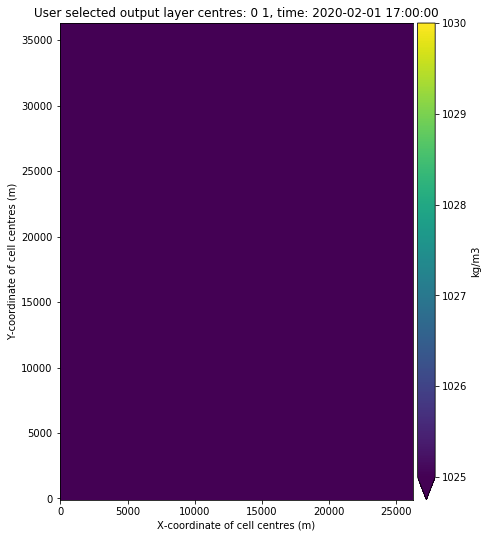

In [19]:
density_plot = hv_density.to(hv.QuadMesh, ["XZ", "YZ"], dynamic=True)\
    .opts(opts.QuadMesh(cmap='viridis', \
                        show_grid=False,
                        clabel=combined.RHO.attrs['units'],
                        clim=(1025, 1030),
                        **plot_settings
                       )\
         )

# datashade() # datashaded for performance but that doens't work like everything in this thesis
density_plot

---
# Animations

## Density

In [20]:
density_selection = combined.RHO.isel(time=slice(0, -1), KMAXOUT_RESTR=79)
density_selection.shape

(90, 132, 182)

In [21]:
hv_dens_animate_set = hv.Dataset(density_selection)

density_animation = hv_dens_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', cmap='viridis', clim=(1025,1035), **plot_settings)

density_animation

hv.save(density_animation, outputfolder + 'densitybottomlayer.mp4', fps=fps)
# hv.output(density_animation, holomap='mp4', fps=fps)

## Velocity

In [22]:
velocity_selection = combined.velocity.isel(time=slice(0, -1), KMAXOUT_RESTR=79)
# velocity_selection

In [23]:
hv_velo_animate_set = hv.Dataset(velocity_selection)
velocity_animation = hv_velo_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh',  cmap='inferno', clim=(0,2.5), **plot_settings)
velocity_animation

hv.save(velocity_animation, outputfolder + 'velocitybottomlayer.mp4', fps=fps)
# hv.output(velocity_animation, holomap='mp4', fps=fps)

# Concentration

## Concentration Sand

In [24]:
combined.NAMCON.isel(time=0, LSTSCI=SAND).values

array(b'Sediment vfsand     ', dtype='|S20')

In [25]:
sand_concentration_all = combined.R1.isel(time=slice(0, -1), LSTSCI=SAND)

In [26]:
hv_sand_concentration_all = hv.Dataset(sand_concentration_all)

:DynamicMap   [KMAXOUT_RESTR,time]
   :QuadMesh   [XZ,YZ]   (R1)
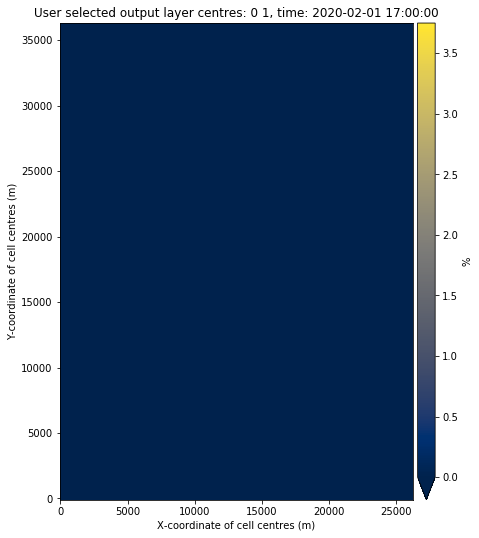

In [27]:
sand_concentration_plot = hv_sand_concentration_all.to(hv.QuadMesh, ["XZ", "YZ"], dynamic=True)\
    .opts(opts.QuadMesh(cmap='cividis', \
                        show_grid=False,
                        clabel="%",
                        clim=(0,3.75),
                        **plot_settings
                       )\
         )

# datashade() # datashaded for performance but that doens't work like everything in this thesis
sand_concentration_plot

In [28]:
sand_concentration_selection = combined.R1.isel(time=slice(0, -1), LSTSCI=SAND, KMAXOUT_RESTR=79)
hv_sand_concentration = hv.Dataset(sand_concentration_selection)

In [29]:
sand_concentration_animation = hv_sand_concentration.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', cmap='cividis', clim=(0,3.75), **plot_settings)

hv.save(sand_concentration_animation, outputfolder + 'sand_concentration_bottomlayer.mp4', fps=fps)
hv.output(sand_concentration_animation, holomap='mp4', fps=fps)

:HoloMap   [time]
   :QuadMesh   [XZ,YZ]   (R1)

## Concentration Silt

In [30]:
silt_concentration_all = combined.R1.isel(time=slice(0, -1), LSTSCI=SILT)

In [31]:
hv_silt_concentration = hv.Dataset(silt_concentration_all)

:DynamicMap   [KMAXOUT_RESTR,time]
   :QuadMesh   [XZ,YZ]   (R1)
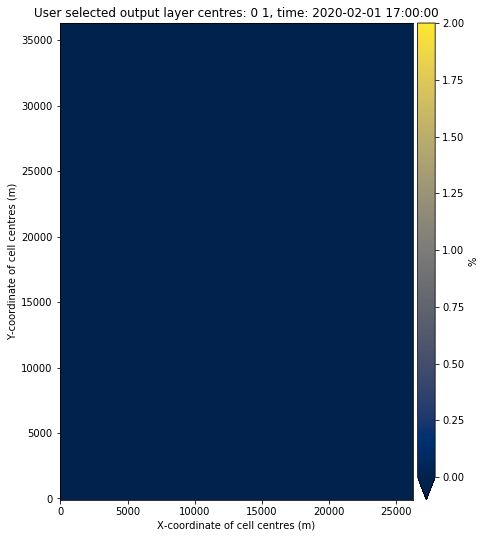

In [32]:
silt_concentration_plot = hv_silt_concentration.to(hv.QuadMesh, ["XZ", "YZ"], dynamic=True)\
    .opts(
        opts.QuadMesh(cmap='cividis', show_grid=False, clabel="%", clim=(0,2),**plot_settings)
    )

# datashade() # datashaded for performance but that doens't work like everything in this thesis
silt_concentration_plot

In [33]:
hv_silt_concentration_bottom = hv.Dataset(silt_concentration_all.isel(KMAXOUT_RESTR=79))
silt_concentration_animation = hv_silt_concentration.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', cmap='cividis', clim=(0,2), **plot_settings)

hv.output(silt_concentration_animation, holomap='mp4', fps=fps)
hv.save(silt_concentration_animation, outputfolder + 'silt_concentration_bottomlayer.mp4', fps=fps)

Animation longer than the max_frames limit 500;
skipping rendering to avoid unexpected lengthy computations.
If desired, the limit can be increased using:
hv.output(max_frames=<insert number>)

:HoloMap   [KMAXOUT_RESTR,time]
   :QuadMesh   [XZ,YZ]   (R1)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x120e0f3b0> (for post_execute):


KeyboardInterrupt: 

## Underlayer Volume Composition

In [ ]:
# combined.LYRFRAC

In [34]:
underlayer_vol_frac_selection = combined.LYRFRAC.isel(time=slice(0, -1), LSEDTOT=SAND, nlyr=0)

In [35]:
hv_underlayer_vol_frac_set = hv.Dataset(underlayer_vol_frac_selection)

:HoloMap   [time]
   :QuadMesh   [XZ,YZ]   (LYRFRAC)
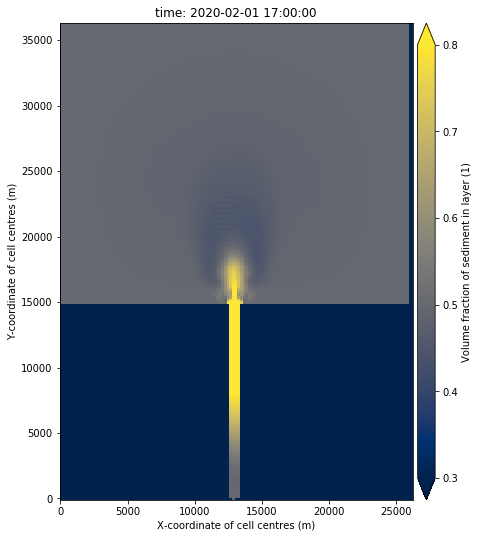
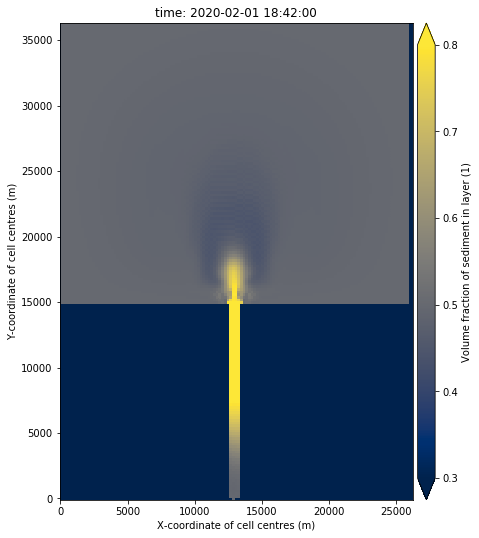
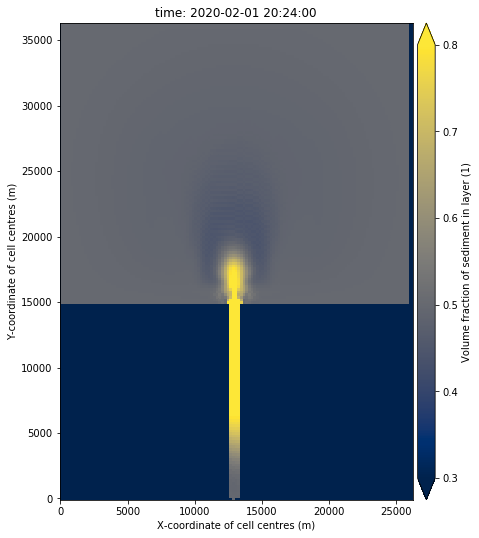
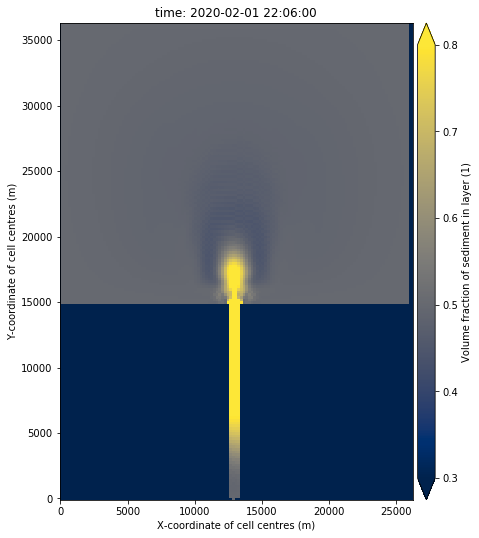
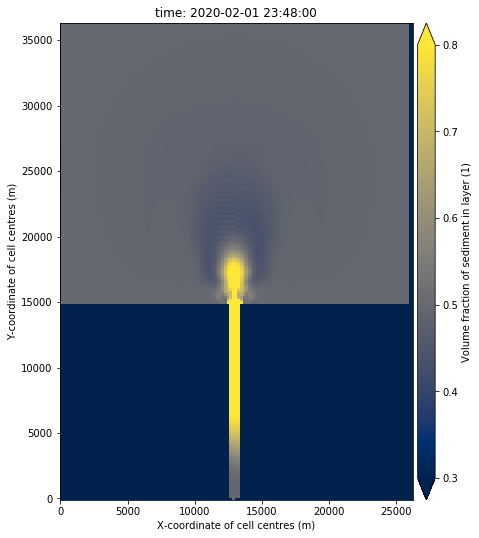
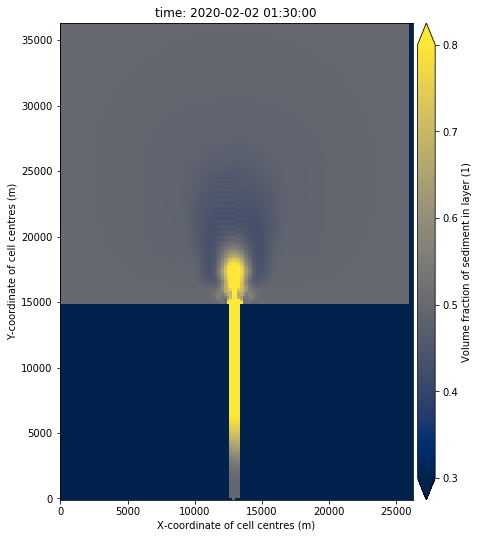
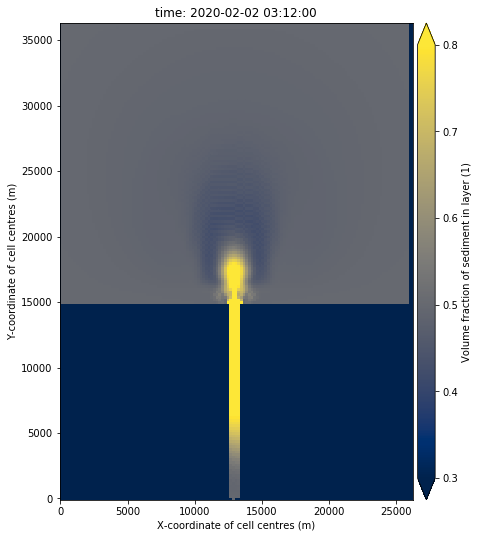
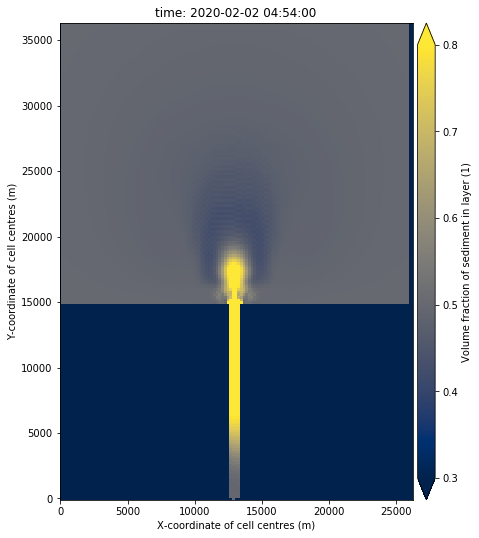
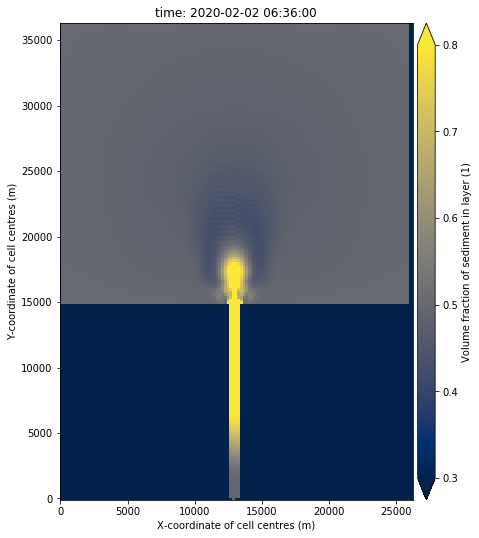
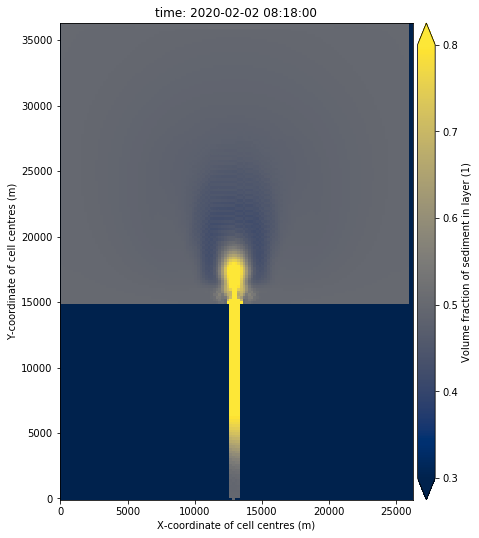
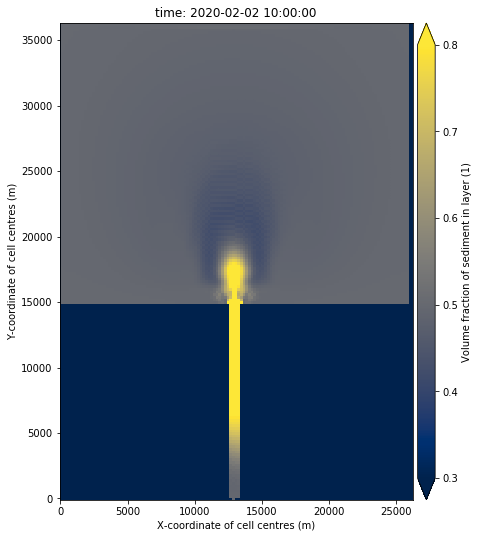
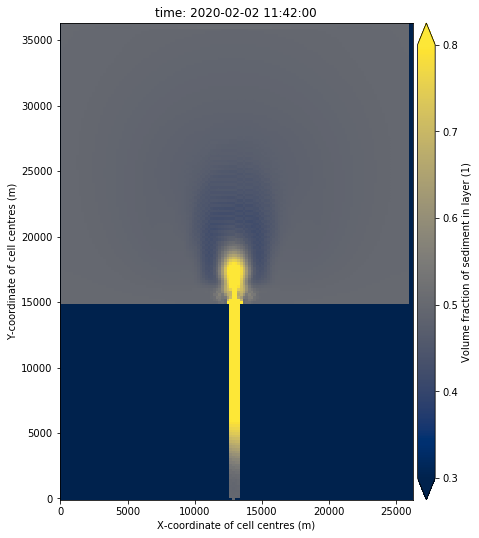
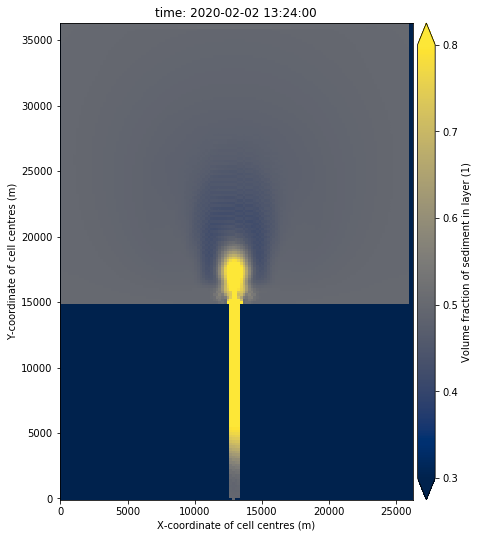
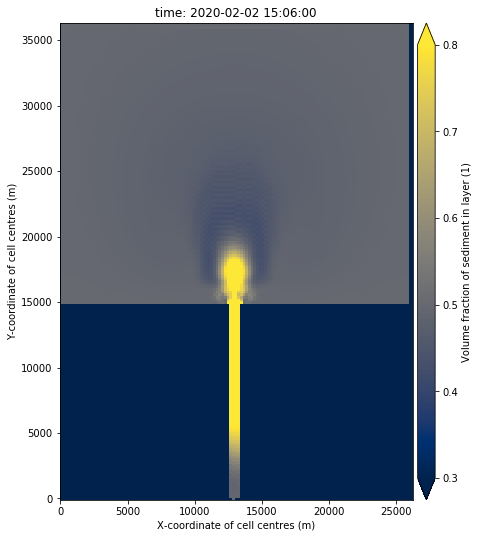
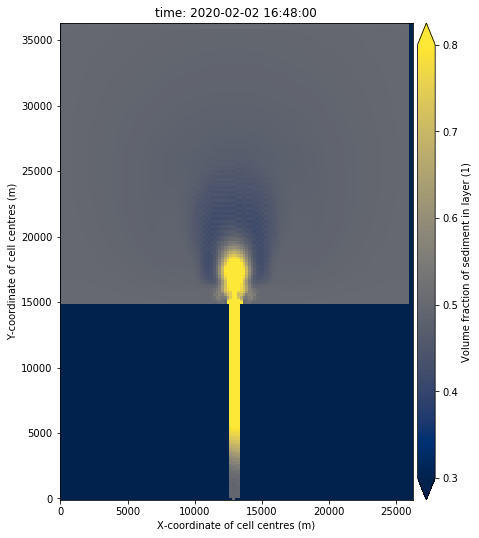
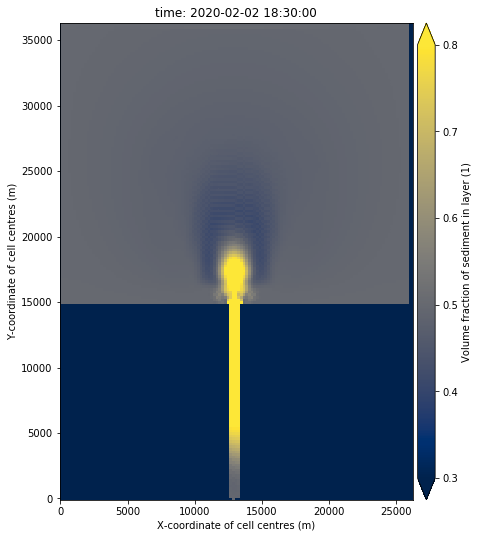
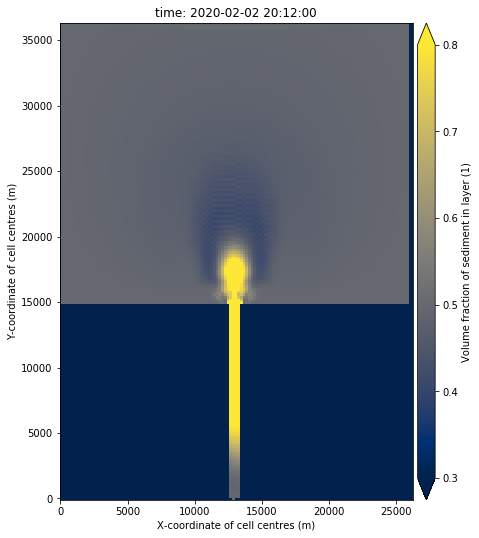
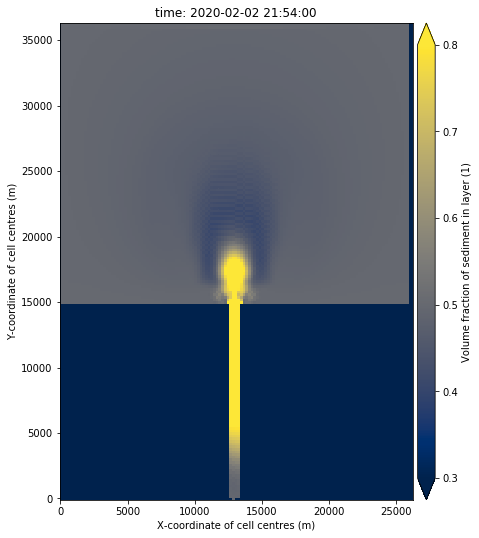
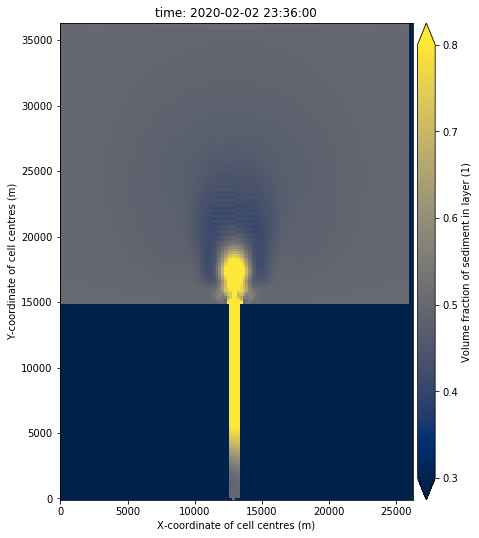
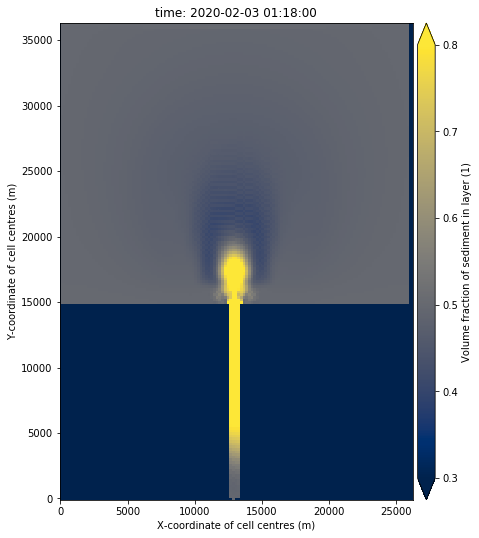
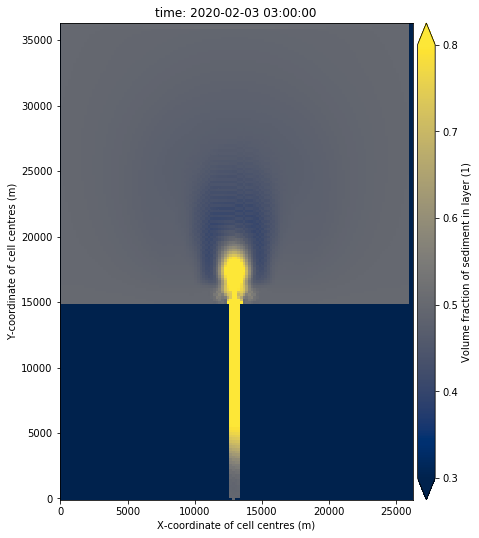
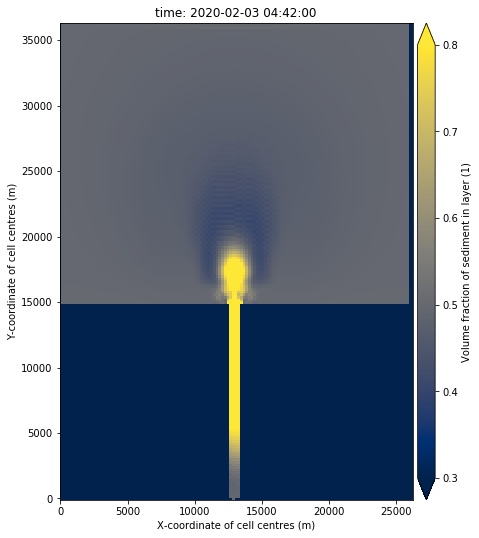
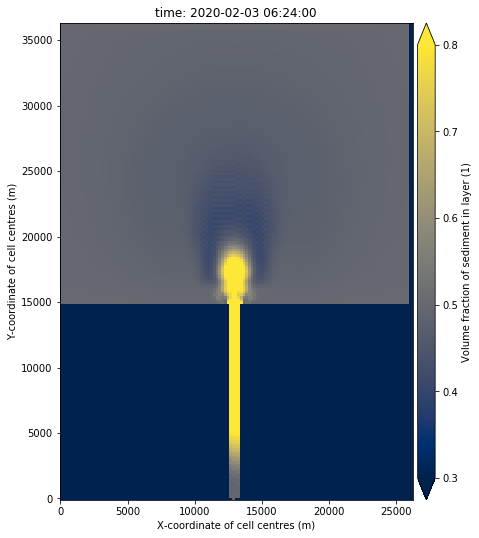
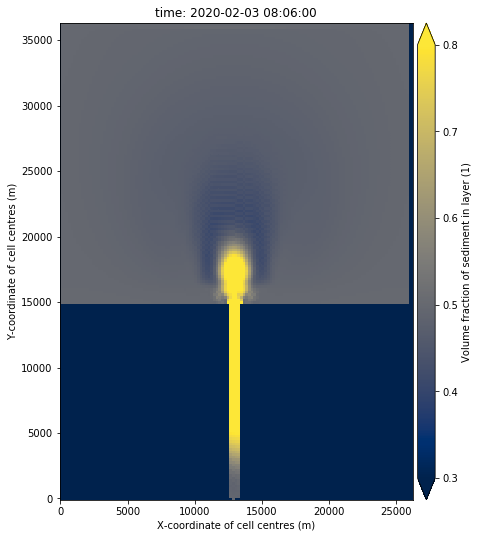
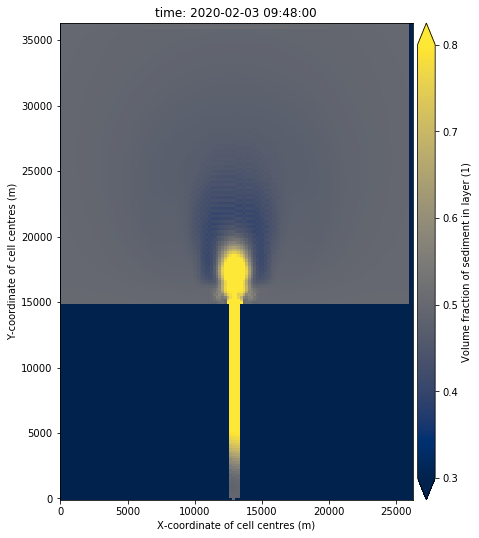
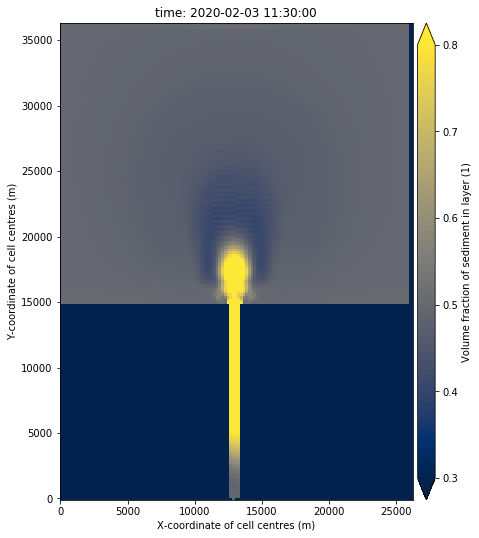
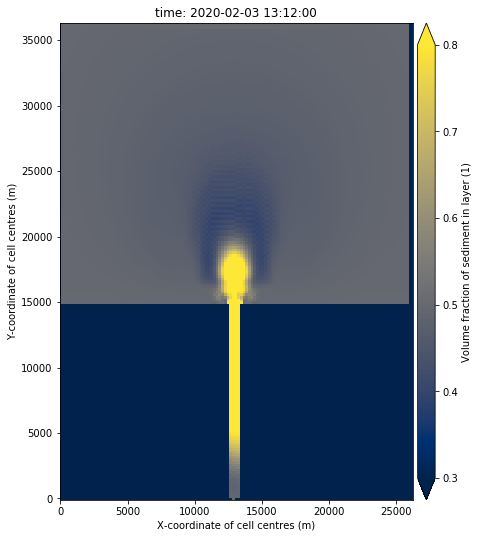
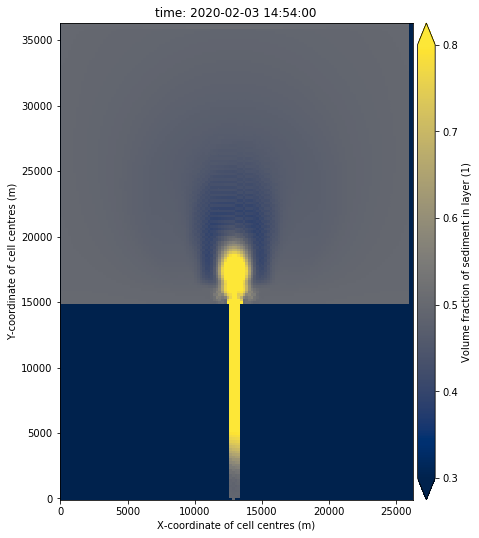
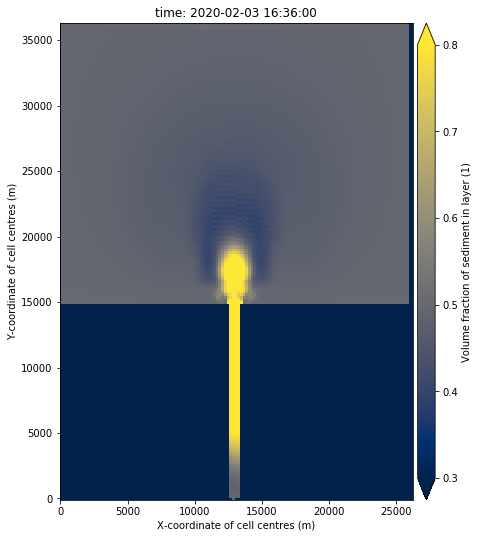
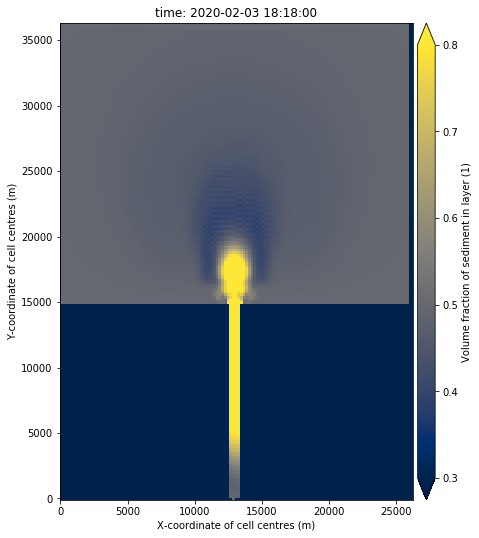
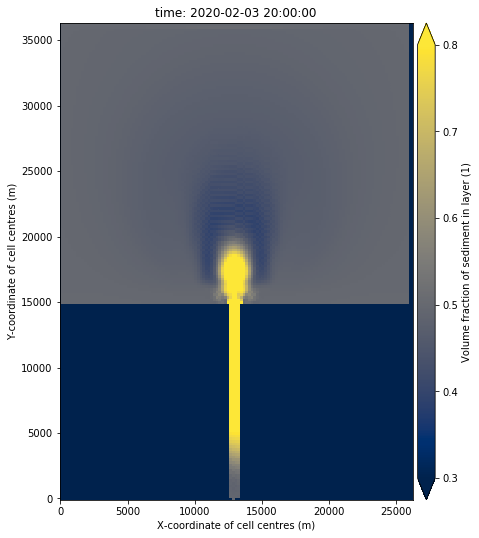
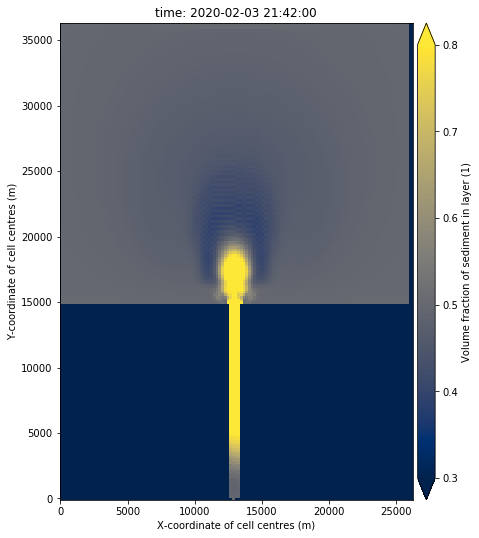
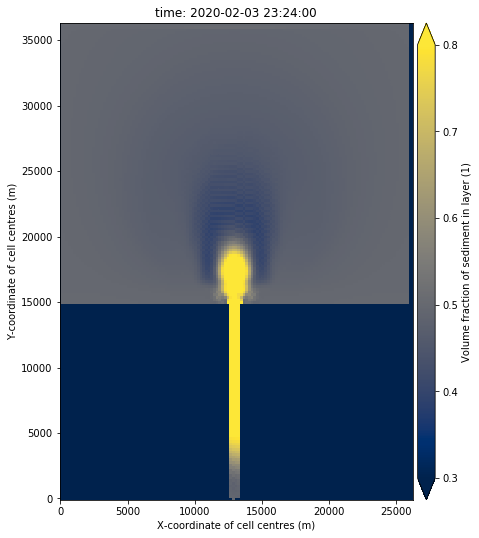
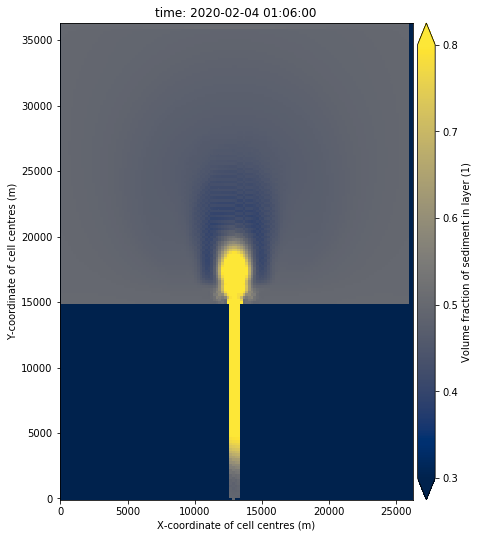
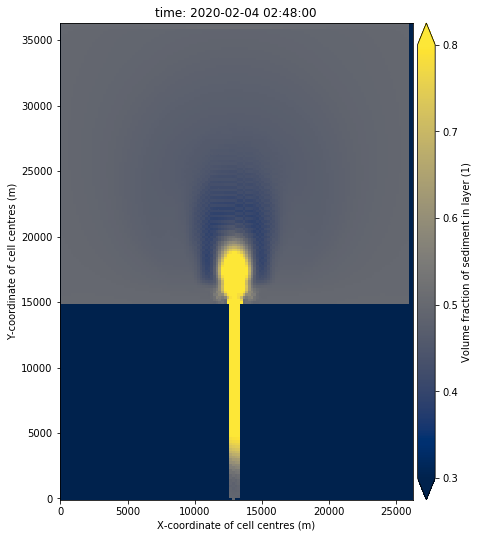
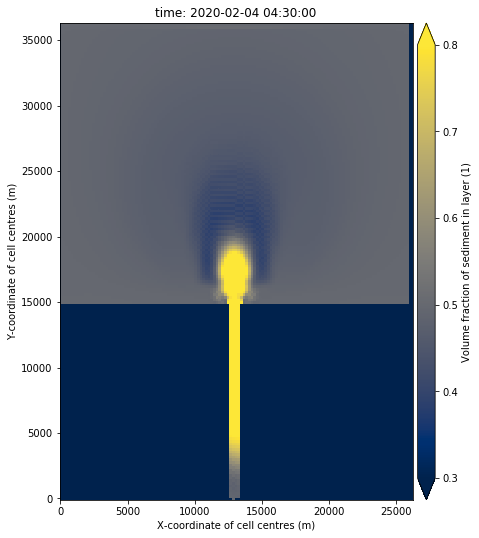
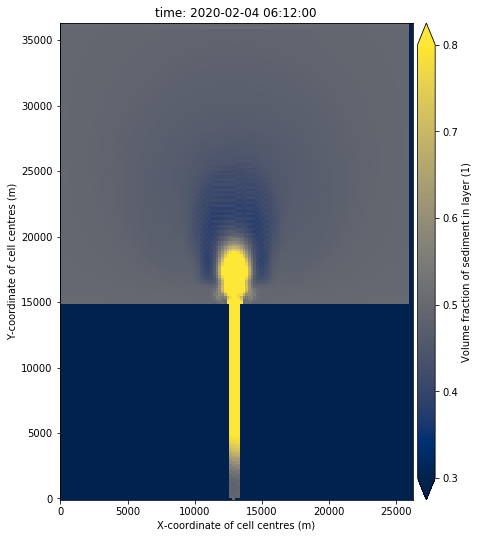
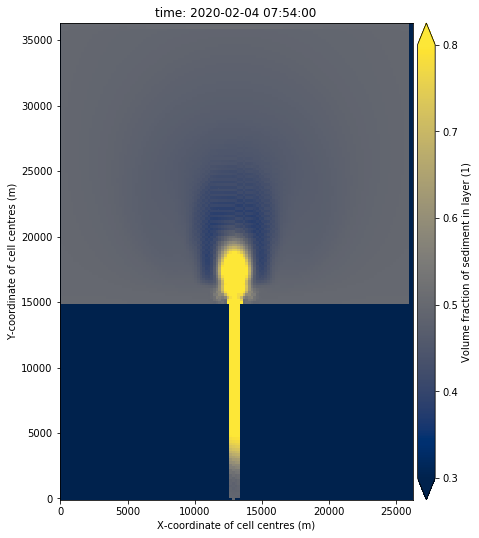
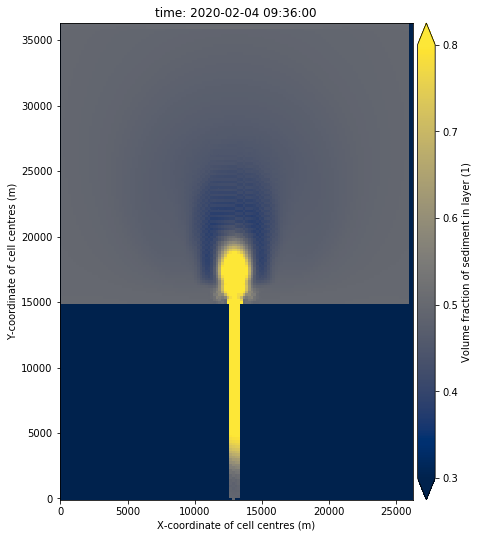
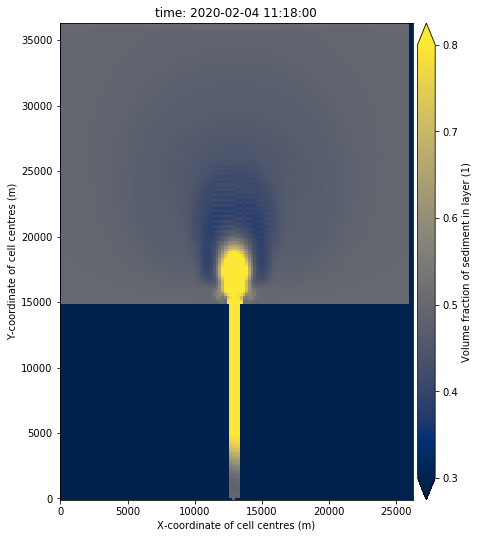
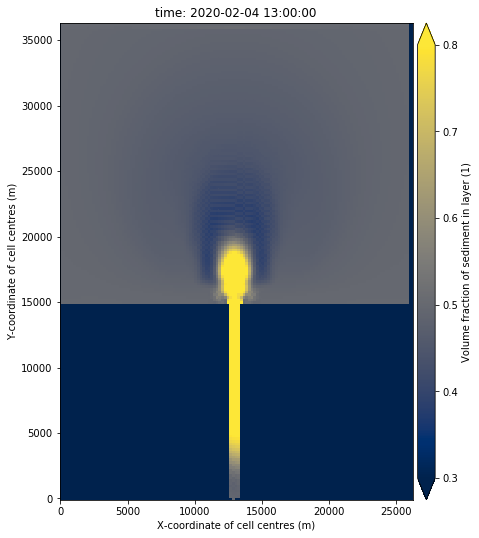
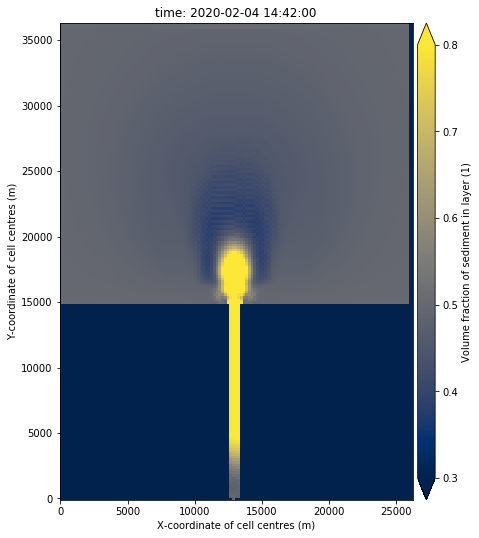
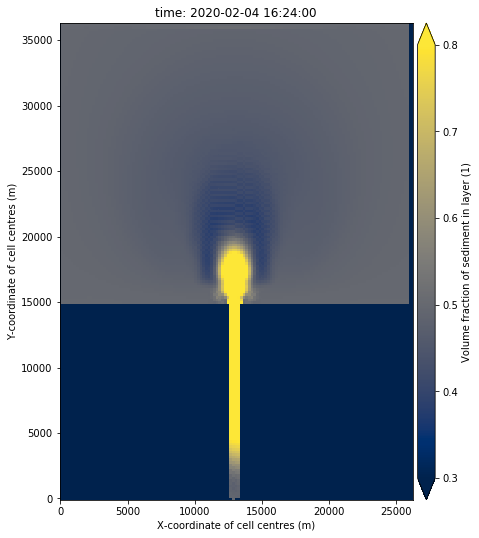
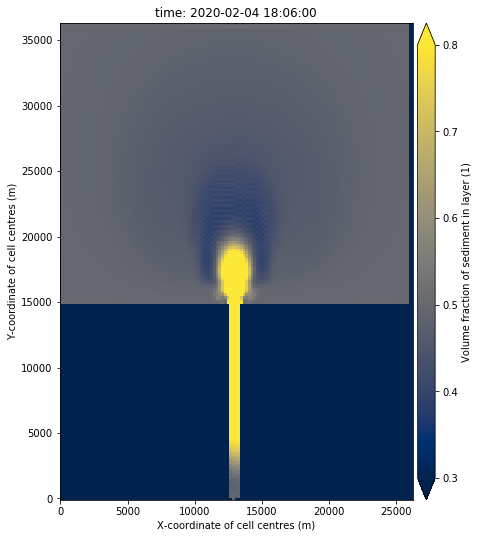
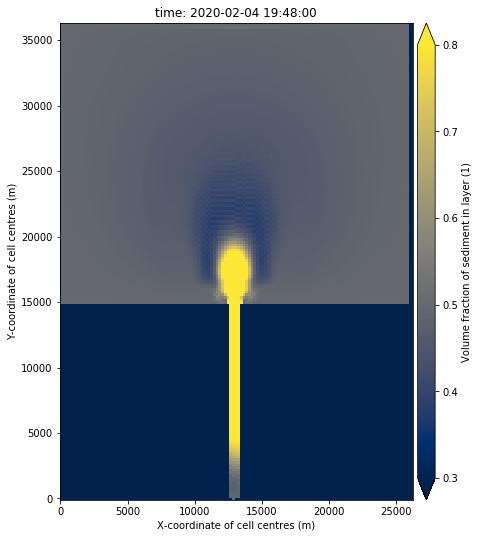
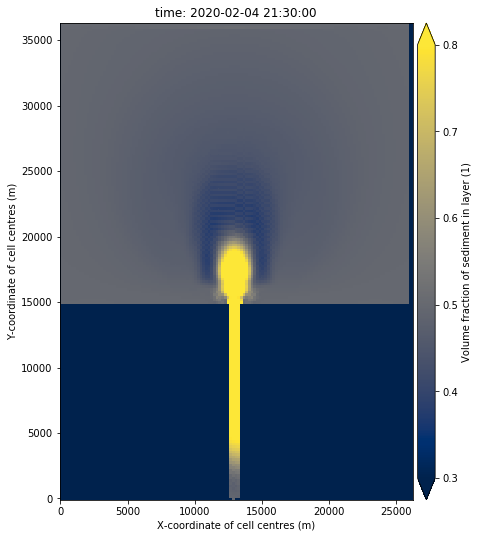
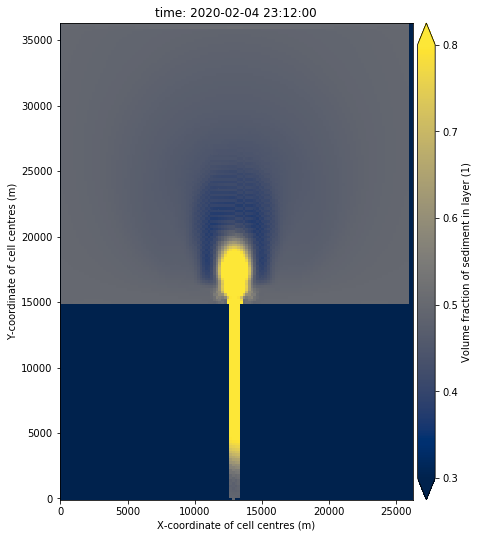
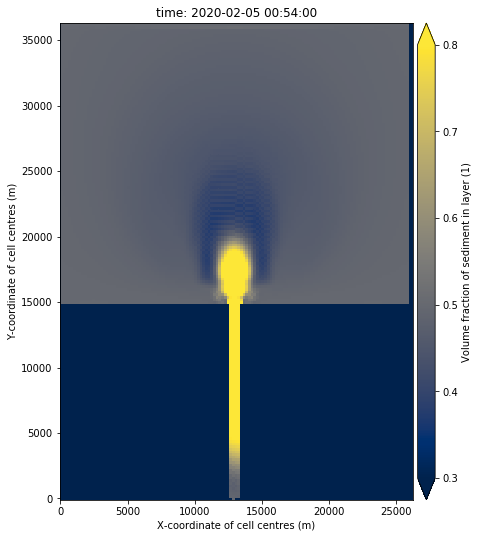
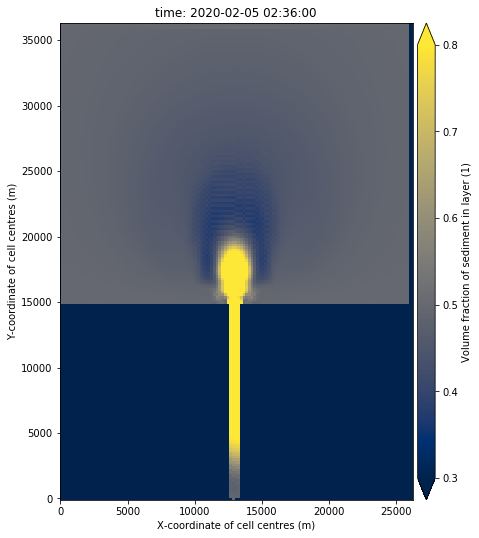
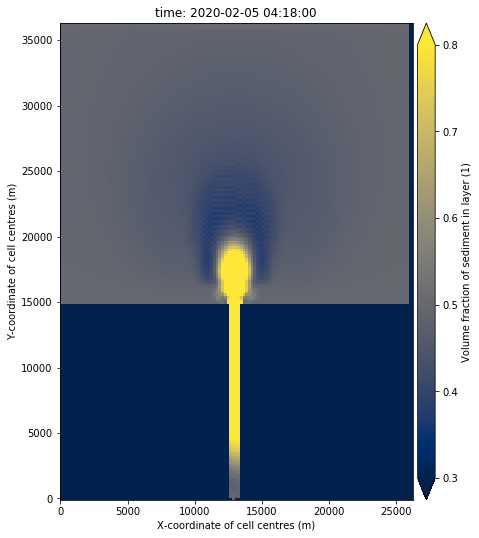
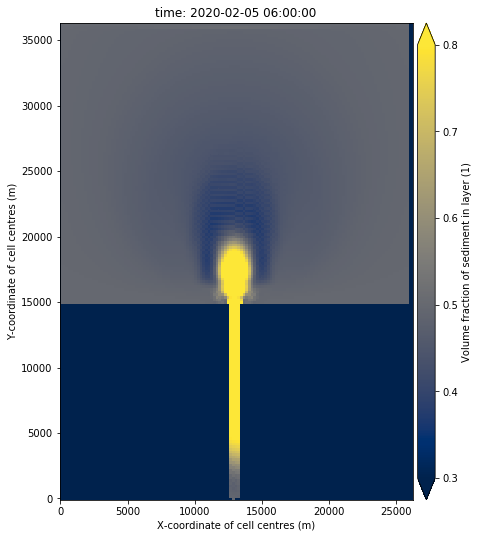
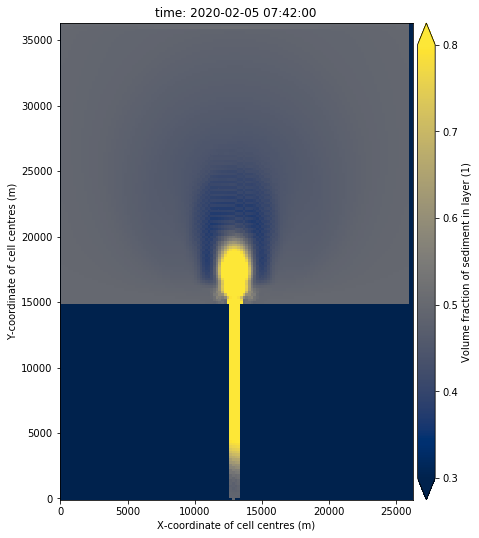
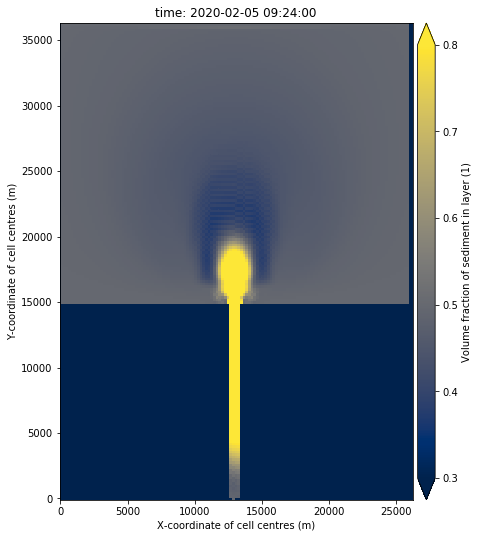
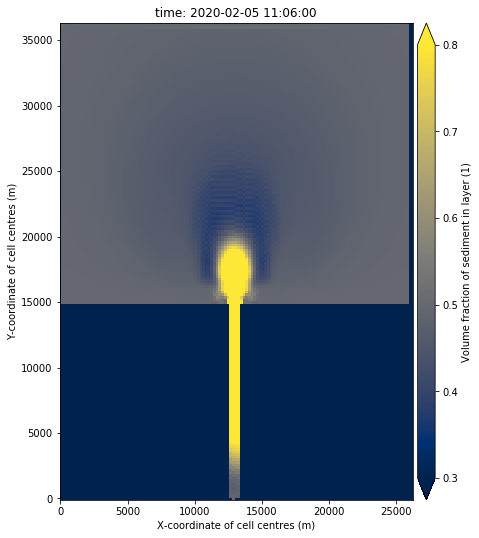
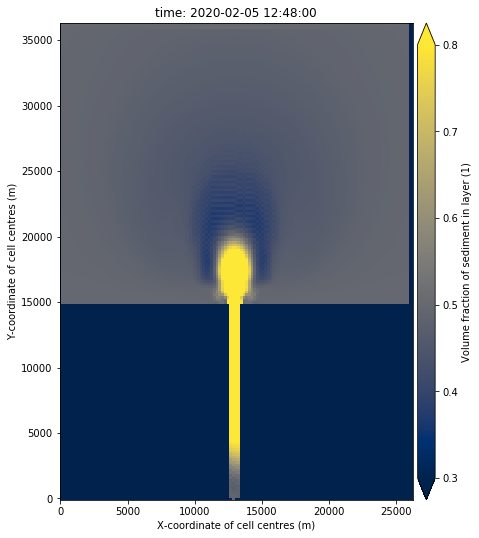
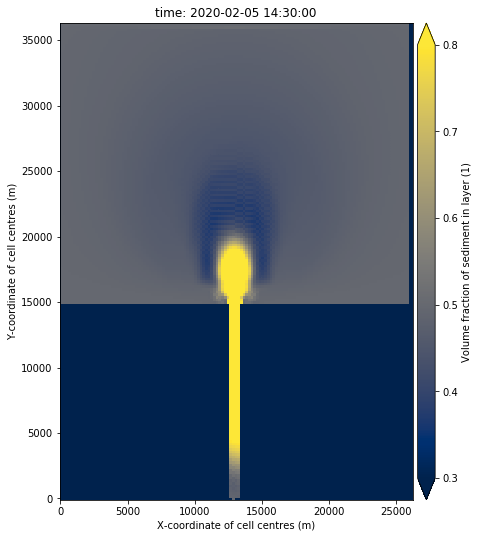
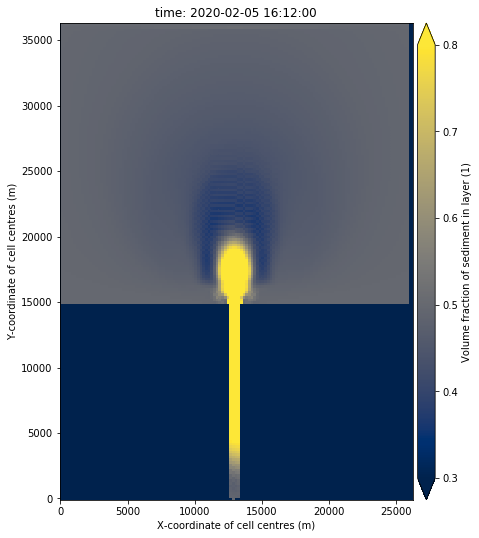
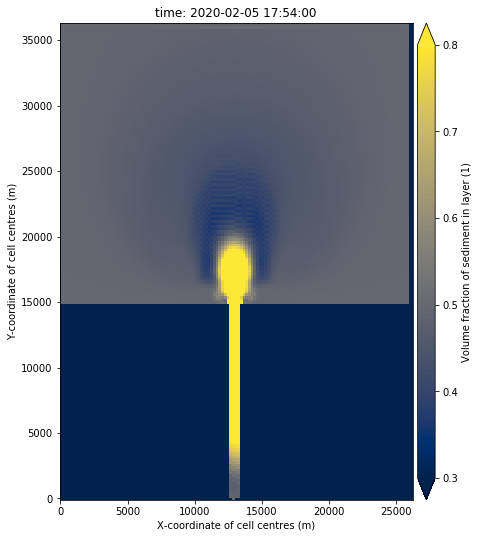
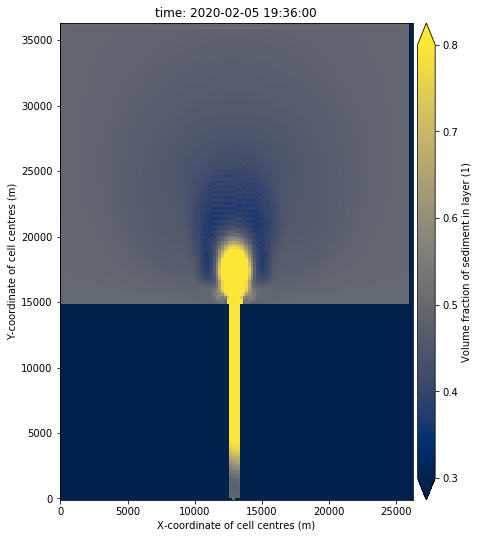
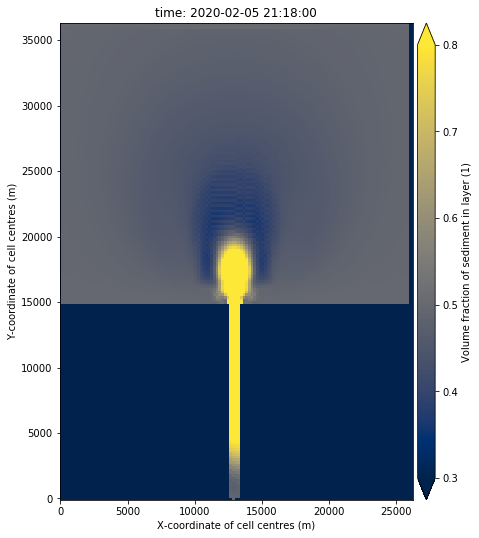
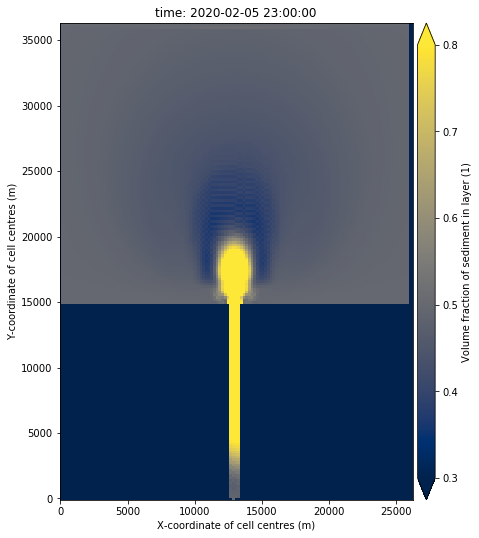
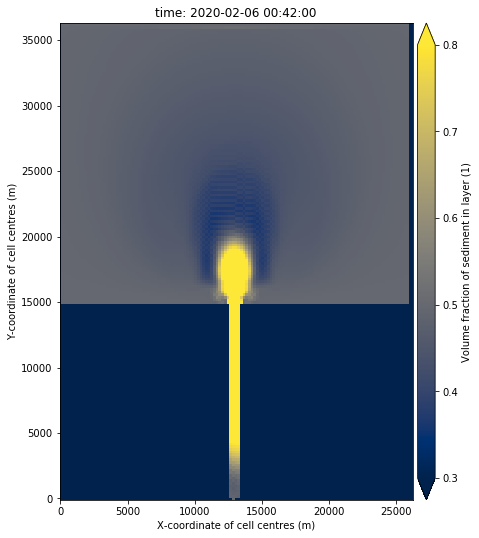
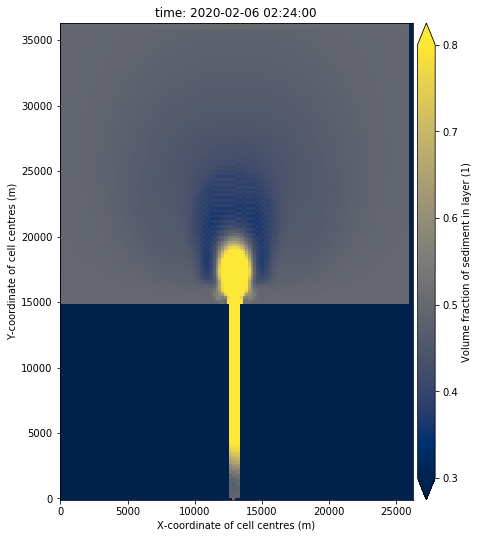
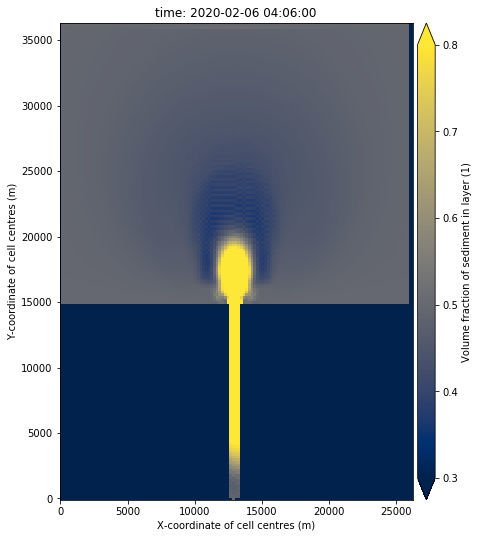
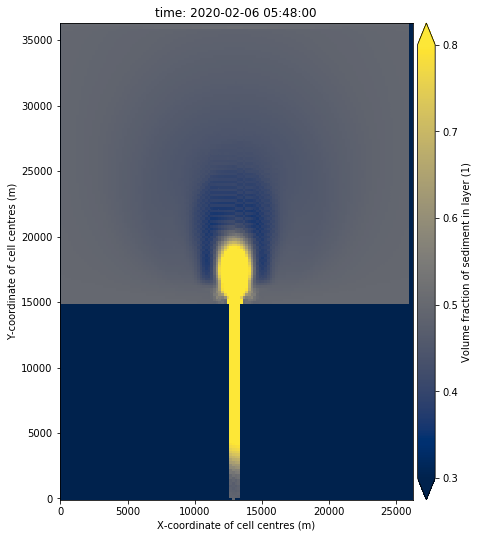
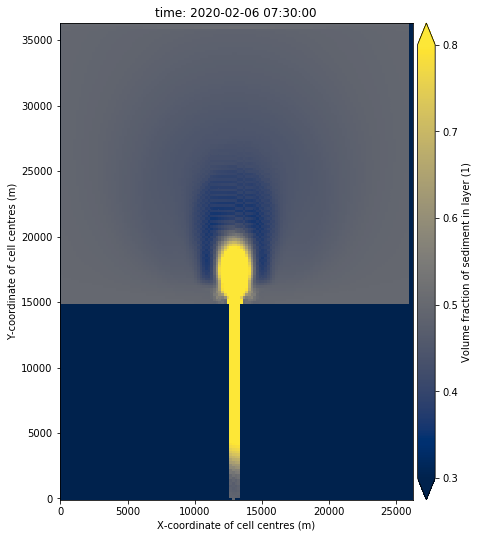
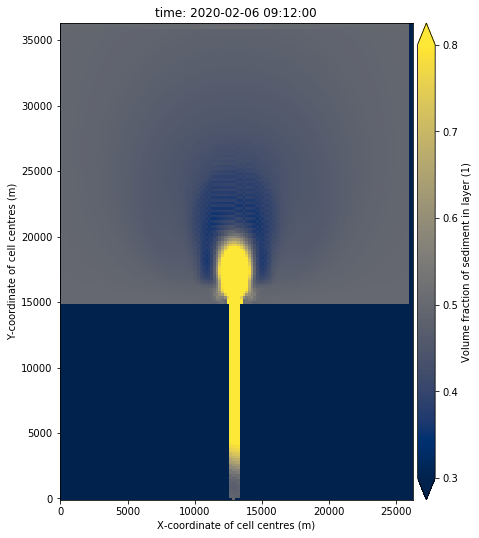
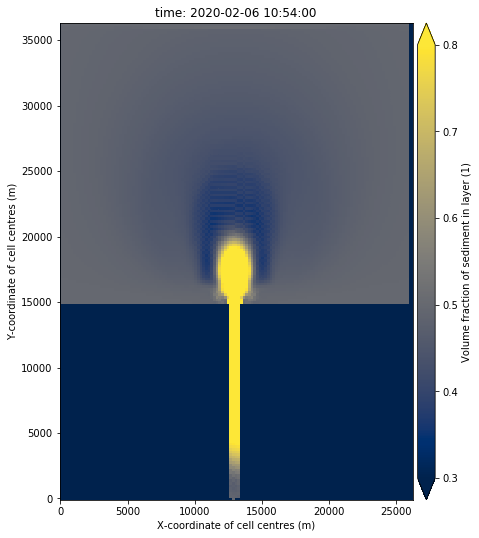
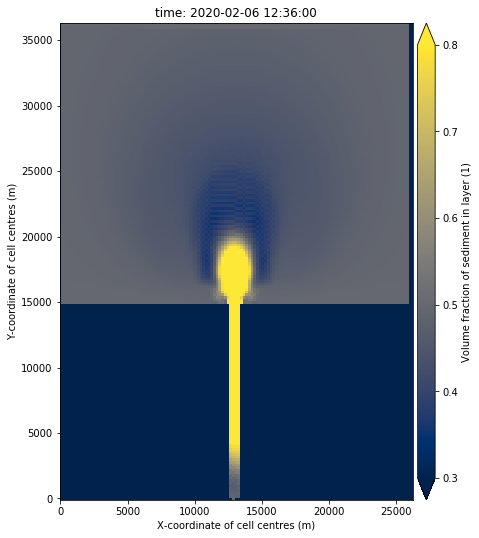
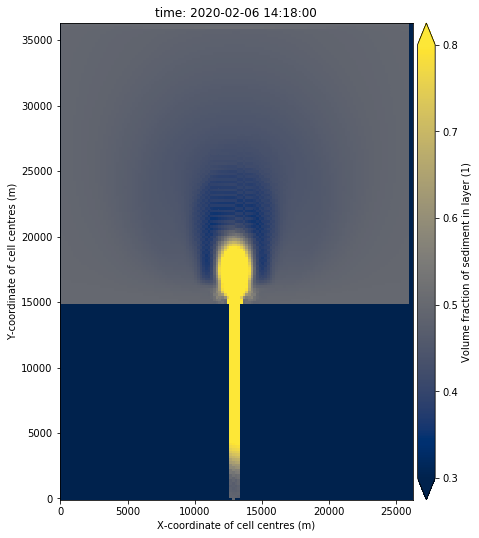
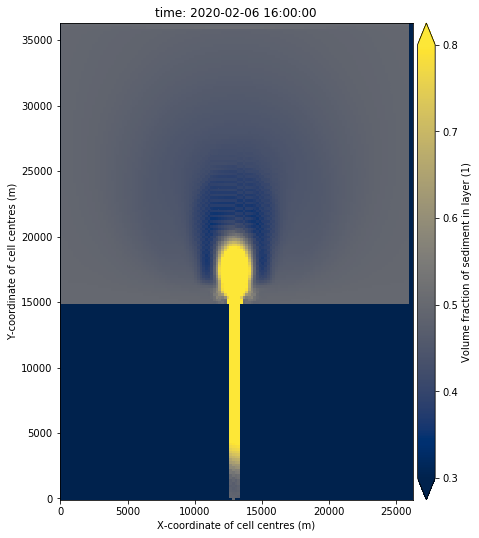
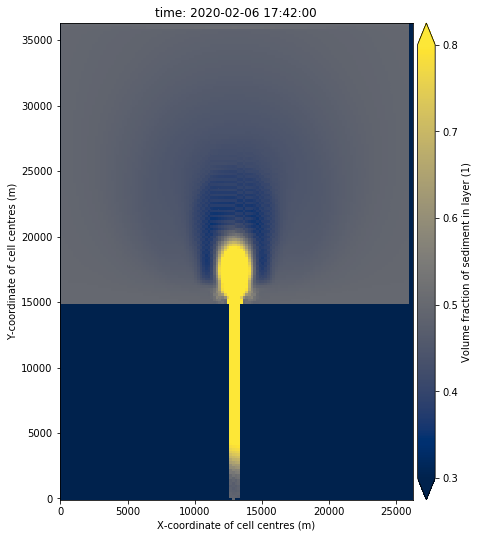
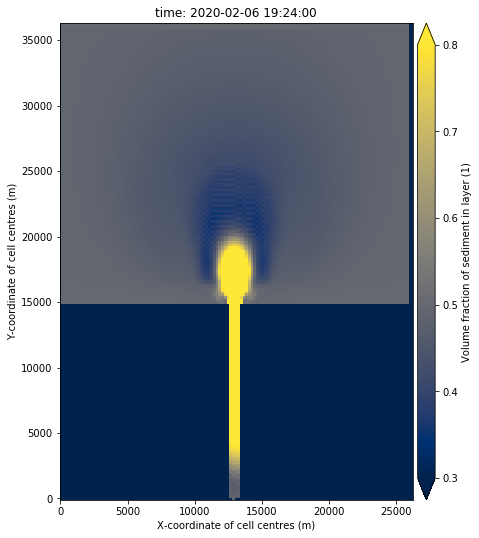
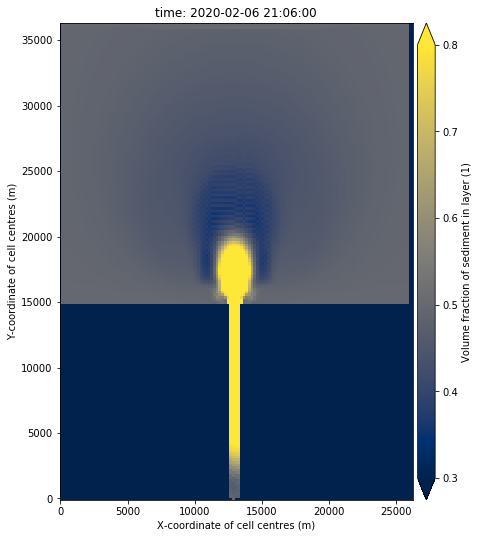
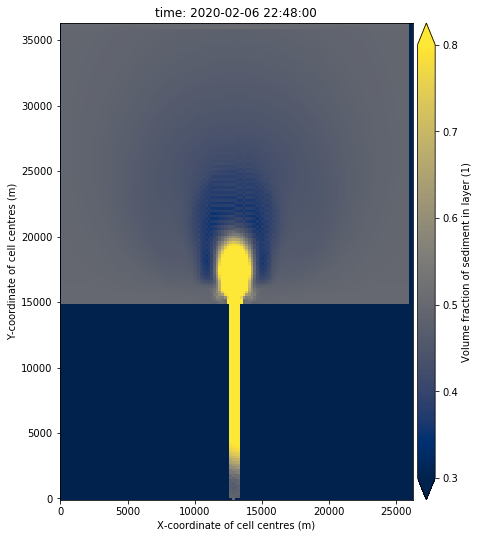
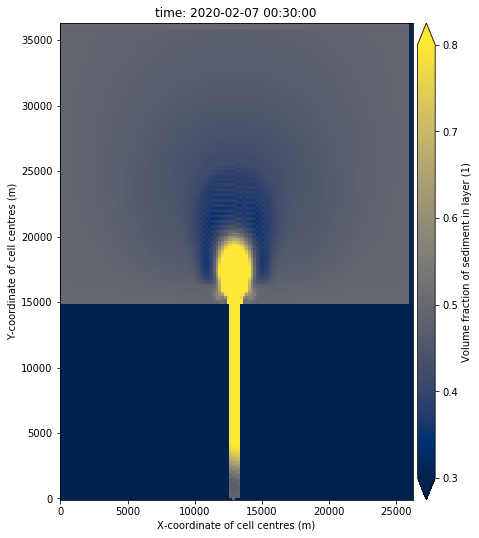
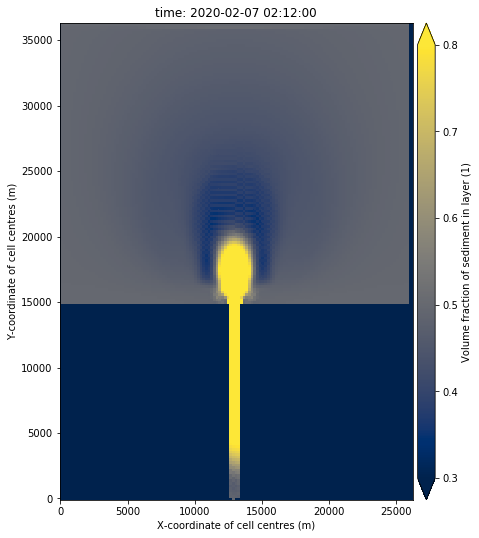
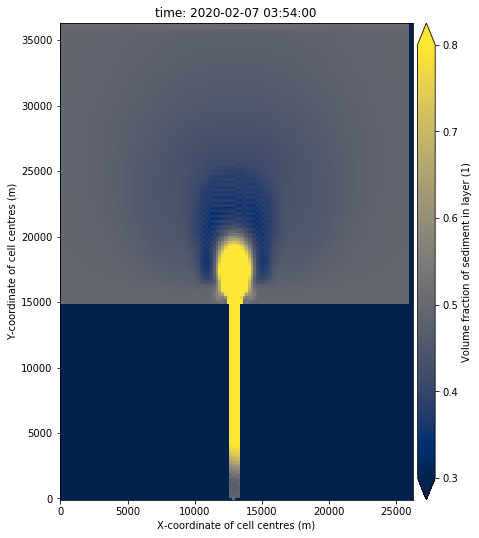
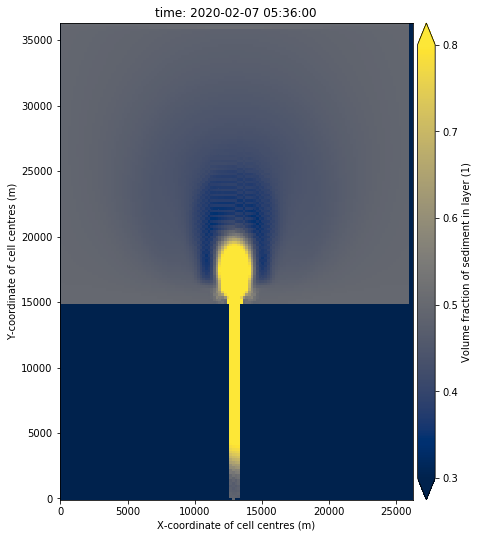
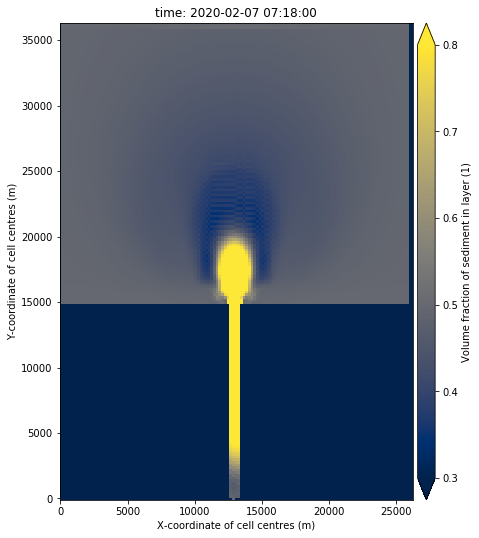
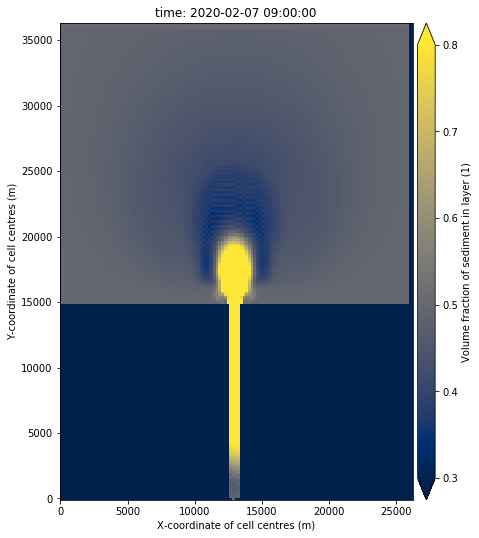
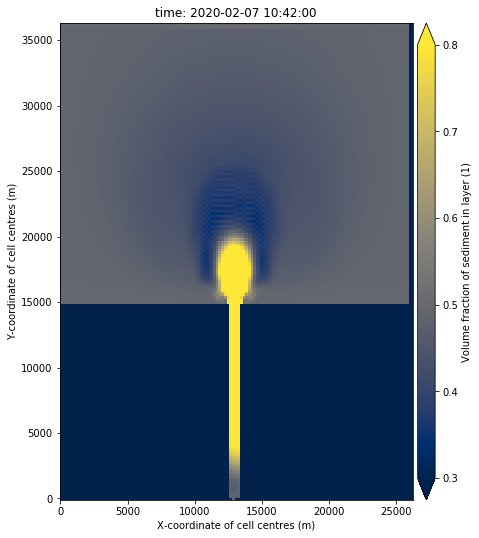
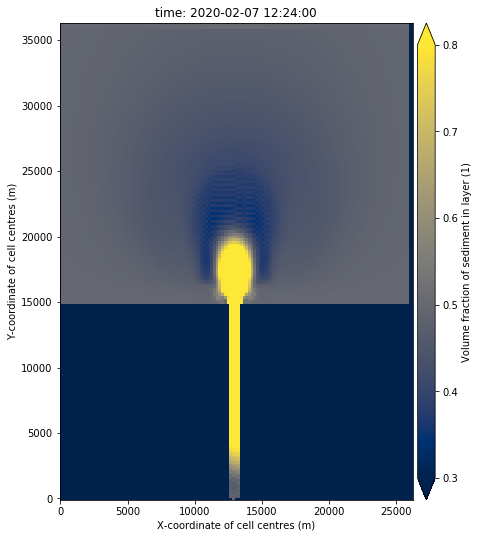
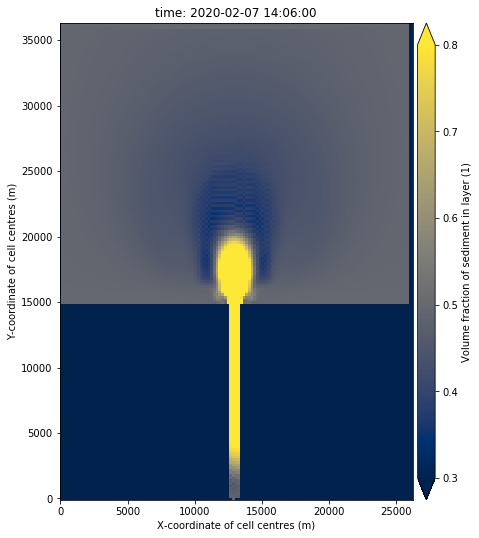
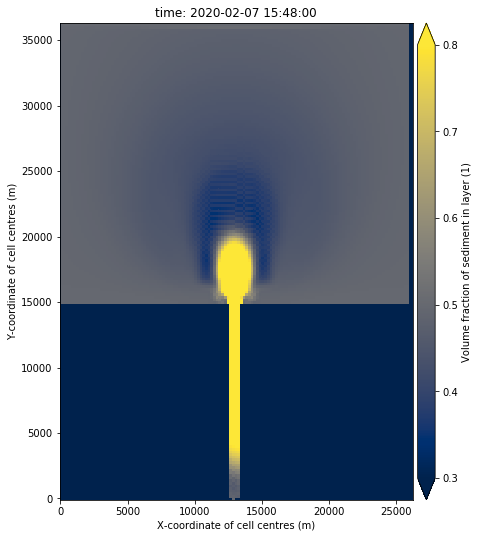
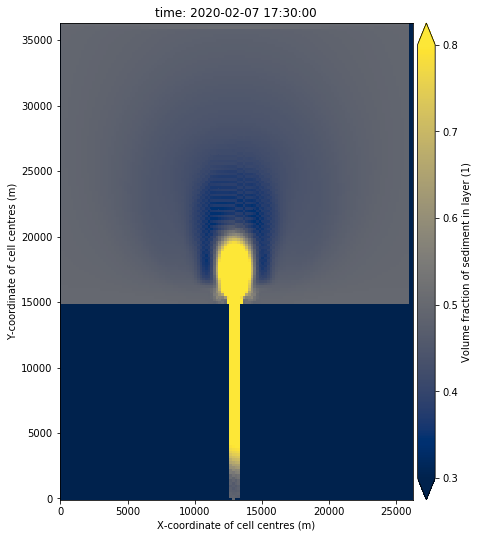
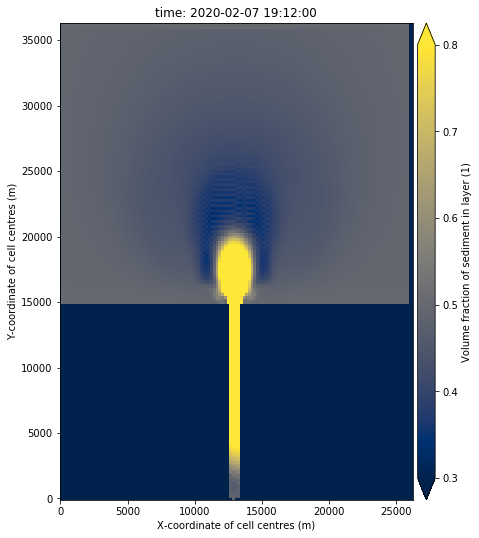
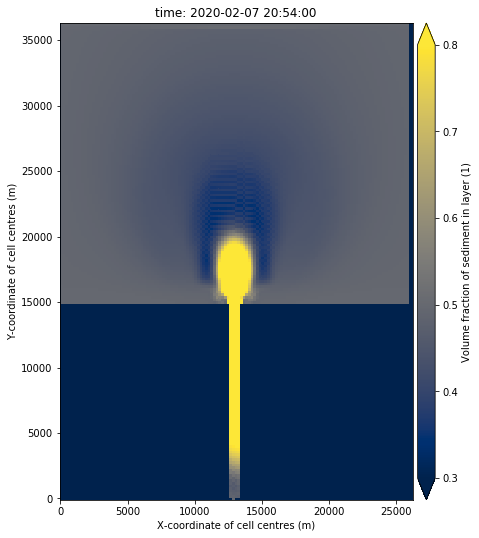
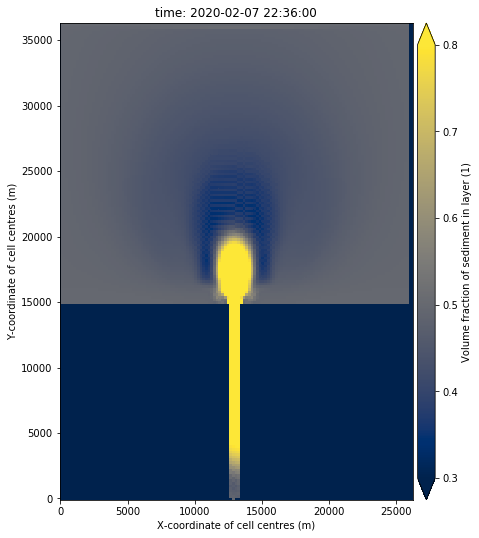
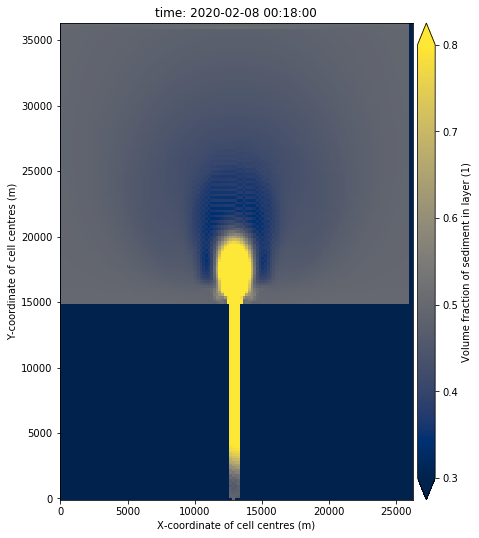

In [36]:
underlayer_vol_frac_animation = hv_underlayer_vol_frac_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', clim=(0.3,0.8), cmap='cividis', **plot_settings)

underlayer_vol_frac_animation 

In [37]:
hv.save(underlayer_vol_frac_animation, outputfolder + 'volfrac_sand_top_underlayer.mp4', fps=fps)
hv.output(underlayer_vol_frac_animation, holomap='mp4', fps=fps)

:HoloMap   [time]
   :QuadMesh   [XZ,YZ]   (LYRFRAC)

## Suspended sand load animation [remember to turn it on boy]

In [38]:
# susp_sand_selection = combined['susp_load_sand'].isel(time=slice(0, -1, 5))

In [39]:
# hv_susp_sand_set = hv.Dataset(susp_sand_selection)
# susp_sand_animation = hv_susp_sand_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
#     .options('QuadMesh', fig_inches=(5.5, 12), clim=(0,0.2), cmap='plasma', colorbar=True, aspect=0.3) 
# susp_sand_animation

# hv.output(susp_sand_animation, holomap='mp4', fps=fps)

### Suspended silt load animation

In [40]:
# susp_silt_selection = combined['susp_load_silt'].isel(time=slice(0, -1, 5))

In [41]:
# hv_susp_silt_set = hv.Dataset(susp_silt_selection)
# susp_silt_animation = hv_susp_silt_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
#     .options('QuadMesh', fig_inches=(5.5, 12),  cmap='plasma', clim=(0,0.2), colorbar=True, aspect=0.3)  
# susp_silt_animation

# hv.output(susp_silt_animation, holomap='mp4', fps=fps)

## Bottom depth

In [42]:
bottom_depth_selection = combined['bottom_diff'].isel(time=slice(0, -1))
bottom_depth_selection

<xarray.DataArray 'bottom_diff' (M: 132, N: 182, time: 90)>
dask.array<getitem, shape=(132, 182, 90), dtype=float32, chunksize=(132, 182, 5), chunktype=numpy.ndarray>
Coordinates:
    XZ       (M, N) int64 0 0 0 0 0 0 0 ... 26100 26100 26100 26100 26100 26100
    YZ       (M, N) int64 0 200 400 600 800 ... 35400 35600 35800 36000 36200
  * time     (time) datetime64[ns] 2020-02-01T17:00:00 ... 2020-02-08T00:18:00
Dimensions without coordinates: M, N

In [43]:
hv_bottom_depth_animate_set = hv.Dataset(bottom_depth_selection)
bottom_depth_animation = hv_bottom_depth_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', clim=(-0.25,0.25), cmap='PiYG', **plot_settings)
bottom_depth_animation

hv.output(bottom_depth_animation, holomap='mp4', fps=fps)
hv.save(bottom_depth_animation, outputfolder + 'bottom_difference_over_time.mp4', fps=fps)

:HoloMap   [time]
   :QuadMesh   [XZ,YZ]   (bottom_diff)

## Deposits through channel line plot

In [44]:
deposits_through_selection = combined['bottom_diff'].isel(M=31, time=slice(0, -1, 5))
deposits_through_selection

<xarray.DataArray 'bottom_diff' (N: 182, time: 18)>
dask.array<getitem, shape=(182, 18), dtype=float32, chunksize=(182, 1), chunktype=numpy.ndarray>
Coordinates:
    XZ       (N) int64 6100 6100 6100 6100 6100 ... 6100 6100 6100 6100 6100
    YZ       (N) int64 0 200 400 600 800 1000 ... 35400 35600 35800 36000 36200
  * time     (time) datetime64[ns] 2020-02-01T17:00:00 ... 2020-02-07T17:30:00
Dimensions without coordinates: N

In [45]:
# hv.help(hv.Curve)

In [46]:
deposits_through_selection.hvplot.line('YZ', 'bottom_diff', height=200, aspect=3)

AttributeError: 'DataArray' object has no attribute 'hvplot'

In [ ]:
hv_deposits_through_selection_set = hv.Dataset(deposits_through_selection)
hv_deposits_through_selection_set

In [ ]:
# deposits_through_selection_animation = hv_deposits_through_selection_set.to(hv.QuadMesh, ['time', 'YZ'])\
#     .options('QuadMesh', fig_inches=(5, 2),  ) #clim=(-2,0.5),
# deposits_through_selection_animation

# # hv.output(deposits_through_selection_animation, holomap='mp4', fps=5)

# Bottom stress

In [ ]:
bottom_stress_selection = combined['bottom_stress'].isel(time=slice(0, -1))

In [ ]:
hv_bottom_stress_animate_set = hv.Dataset(bottom_stress_selection)
bottom_stress_animation = hv_bottom_stress_animate_set.to(hv.QuadMesh, ['XZ', 'YZ'])\
    .options('QuadMesh', clim=(0,20), cmap='Viridis', **anim_options)
bottom_stress_animation

hv.output(bottom_stress_animation, holomap='mp4', fps=fps)